## Exercice de statistiques descriptives

In [510]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [511]:
data_facteurs = pd.read_excel('data_exercice.xlsx',sheet_name = 'Facteurs')

In [512]:
data_coûts = pd.read_excel('data_exercice.xlsx',sheet_name = 'Cout')

In [513]:
data_facteurs

Id Version        D1        D2 Panne  X1  X2  X3  X4  X5  X6  X7  X8  \
0    348606      v3  13665.09  11751.56     G   0   0   0   1   0   1   0   0   
1    348762      v2   4888.38   3944.48     A   0   0   0   1   0   1   0   1   
2    348855      v1  10273.96  13592.97     A   1   0   1   1   0   1   0   0   
3    348906      v2   2149.26   3965.84     C   0   0   0   0   0   0   1   0   
4    348946      v3      1.13      6.23     D   0   0   0   0   0   0   0   0   
..      ...     ...       ...       ...   ...  ..  ..  ..  ..  ..  ..  ..  ..   
456  394339      v1   2398.99   2279.29     F   0   0   0   0   0   0   1   0   
457  394414      v1  16258.44  15915.87     I   0   0   0   0   0   1   1   0   
458  394490      v1   2141.35   1755.97     A   1   0   0   1   0   1   0   0   
459  394590      v1    622.63   3266.30     A   0   0   0   0   0   0   0   0   
460  394609      v1   4052.18   4509.63     A   0   0   1   1   1   1   0   0   

     X9  X10  X11  X12  X13  X14  X15  
0     0    0    0    0    0    0    0  
1     0    0    0    0    0    0    0  
2     0    1    0    0    0    1    0  
3     0    1    0    0    0    0    0  
4     0    0    0    0    0    0    1  
..   ..  ...  ...  ...  ...  ...  ...  
456   0    0    0    0    0    0    0  
457   0    0    0    0    0    1    0  
458   0    0    0    0    0    1    0  
459   0    0    0    0    0    0    0  
460   1    0    0    0    0    1    0  

[461 rows x 20 columns]

In [514]:
data_coûts

Id Panne   Cout
0    349483     A  15.84
1    350021     D  19.14
2    350212     B   9.90
3    351351     F   4.40
4    351351     F  28.16
..      ...   ...    ...
104  388579     C  55.00
105  388579     C   4.40
106  388839     I  55.00
107  388839     I  55.00
108  394414     I  55.00

[109 rows x 3 columns]

In [515]:
# Interressons-nous dans un 1er temps au dataframe data_facteurs 

In [516]:
data_facteurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       461 non-null    int64  
 1   Version  461 non-null    object 
 2   D1       461 non-null    float64
 3   D2       461 non-null    float64
 4   Panne    461 non-null    object 
 5   X1       461 non-null    int64  
 6   X2       461 non-null    int64  
 7   X3       461 non-null    int64  
 8   X4       461 non-null    int64  
 9   X5       461 non-null    int64  
 10  X6       461 non-null    int64  
 11  X7       461 non-null    int64  
 12  X8       461 non-null    int64  
 13  X9       461 non-null    int64  
 14  X10      461 non-null    int64  
 15  X11      461 non-null    int64  
 16  X12      461 non-null    int64  
 17  X13      461 non-null    int64  
 18  X14      461 non-null    int64  
 19  X15      461 non-null    int64  
dtypes: float64(2), int64(16), object(2)
memory usage: 72.2

In [517]:
# notre dataFrame ne contient aucune donnée manquante

In [518]:
# certains produits apparîssent plusieurs fois dans le DataFrame; cela laisse penser que
# certains produits reviennent en atelier après une 1ère réparation/amélioration version...Considérant cette hypothèse,
# nous chercherons à savoir lesquelles, et aussi si elles reviennent en atelier pour les mêmes pannes

In [519]:
prod_double_panne = data_facteurs['Id'].value_counts()[data_facteurs['Id'].value_counts() > 1].index

In [520]:
prod_double_panne

Int64Index([360575, 369824, 378986, 375212, 374836, 391614, 373505, 384241,
            385553, 370540],
           dtype='int64')

In [521]:
liste_indices = list()
for i in prod_double_panne:
    v = data_facteurs[(data_facteurs['Id']  == i)].index
    for j in v:
        liste_indices.append(j)

In [522]:
np.transpose(liste_indices)

array([116, 117, 212, 213, 303, 304, 270, 271, 261, 262, 433, 434, 249,
       250, 359, 360, 370, 371, 221, 222])

In [523]:
data_facteurs.iloc[liste_indices]

Id Version        D1        D2 Panne  X1  X2  X3  X4  X5  X6  X7  X8  \
116  360575      v3  14571.35  13407.85     G   1   0   0   1   0   1   0   0   
117  360575      v3  14571.35  13407.85     G   0   0   0   0   0   0   0   0   
212  369824      v3  11542.95  20494.03     A   0   0   1   1   0   1   0   0   
213  369824      v1  30546.16  33090.20     A   0   0   0   1   1   0   0   0   
303  378986      v1    101.70     80.10     A   0   0   1   1   0   1   1   0   
304  378986      v3  12510.23  12427.96     A   0   0   0   0   0   0   0   0   
270  375212      v3  12634.53  23592.12     F   0   0   0   1   0   1   0   0   
271  375212      v1   4506.44   8456.78     F   1   1   0   1   0   1   1   0   
261  374836      v3  16596.31  16170.41     A   1   1   0   1   0   0   0   0   
262  374836      v3  16596.31  16170.41     A   1   0   0   1   0   1   1   0   
433  391614      v3  14728.42  13606.32     G   1   0   0   1   0   0   0   1   
434  391614      v3  14640.28  13525.33     G   1   1   0   0   0   1   0   0   
249  373505      v1  11761.04   4002.33     D   1   0   0   1   0   1   0   0   
250  373505      v1   7135.95  19375.30     D   1   0   0   1   0   1   0   0   
359  384241      v3  12484.24  22751.96     G   1   0   0   0   0   0   0   0   
360  384241      v3  12517.01  22796.46     G   1   1   0   0   0   1   0   0   
370  385553      v1  22588.70  21847.72     G   0   0   0   0   0   1   0   0   
371  385553      v1  21155.86  19953.80     G   0   0   0   1   0   1   0   1   
221  370540      v3  14569.09  19757.11     G   0   0   0   0   0   0   0   0   
222  370540      v3  14555.53  19743.76     G   0   0   0   0   0   0   0   0   

     X9  X10  X11  X12  X13  X14  X15  
116   0    0    0    0    0    1    0  
117   0    0    0    0    0    0    1  
212   0    0    0    0    0    1    0  
213   0    0    0    0    0    0    0  
303   0    1    0    0    0    1    0  
304   0    0    0    0    0    0    1  
270   0    0    0    0    0    1    0  
271   0    0    0    0    0    1    0  
261   0    0    0    0    0    0    0  
262   0    0    0    0    0    0    0  
433   0    0    0    0    0    0    0  
434   0    0    0    0    0    1    0  
249   1    0    0    0    0    1    0  
250   0    0    0    0    0    0    0  
359   0    0    0    0    0    0    0  
360   0    1    0    0    0    1    0  
370   0    0    0    0    0    1    0  
371   0    0    0    0    0    0    0  
221   0    0    0    0    1    1    0  
222   0    0    0    0    0    0    1

In [524]:
# tous les produits qui reviennent en atelier reviennent pour la même panne, quelques fois 
# malgré parfois amélioration de version, et avec des diagnostics et délais différents

# Aucun des produits de version v2 n'est allé en réparation plus d'une fois

In [525]:
versions_D1 = data_facteurs.pivot_table(index = 'Version', values = 'D1',aggfunc = np.mean,margins = True)
versions_D1_np = versions_D1.to_numpy()
versions_D1

D1
Version              
v1        6284.123714
v2        3881.948824
v3       11059.785427
All       7894.474143

In [526]:
versions_D2 = data_facteurs.pivot_table(index = 'Version', values = 'D2',aggfunc = np.mean,margins = True)
versions_D2_np = versions_D2.to_numpy()
versions_D2

D2
Version              
v1        6611.409500
v2        4919.448824
v3       13018.019146
All       8828.157115

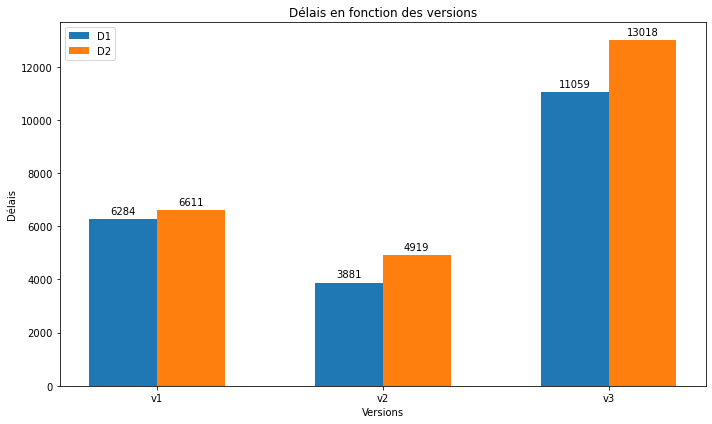

In [527]:
# Define data

labels = ['v1', 'v2', 'v3']

D1 = [int(versions_D1_np[0]),int(versions_D1_np[1]),int(versions_D1_np[2])]
D2 = [int(versions_D2_np[0]),int(versions_D2_np[1]),int(versions_D2_np[2])]
x = np.arange(len(labels)) 

x = np.arange(len(labels))# the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-width/2, D1, width, label='D1')
rects2 = ax.bar(x+width/2, D2, width, label='D2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Délais')
ax.set_xlabel('Versions')
ax.set_title('Délais en fonction des versions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig('Délais_versions.png')

In [528]:
# Nous constatons que la version v2 a des délais de fonctionnnement D1 et D2 inférieurs à ceux des versions v1 et v3

In [529]:
#Occurences des Pannes
data_facteurs['Panne'].value_counts()

A    231
F     60
G     53
E     35
D     31
C     21
I     15
B      9
H      6
Name: Panne, dtype: int64

In [530]:
#les pannes A sont largement prépondérentes dans notre Dataframe (quasiment 4x plus que la 2eme panne la plus représentée:F)

In [531]:
data_facteurs[(data_facteurs['Panne'] == 'A')&(data_facteurs['Version'] == 'v1')].shape[0]/data_facteurs[(data_facteurs['Panne'] == 'A')].shape[0]

0.7012987012987013

In [532]:
# plus de 70% des pannes de type A sont de version v1

In [533]:
# Interresserons-nous aux proba conditionnelles, particulièrement à Proba( panne P=p \ version V=v )

In [534]:
dict_panne = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8}
data_facteurs2 = data_facteurs.copy()
panne = data_facteurs2['Panne'].map(dict_panne)
data_facteurs2['Panne'] = panne
data_facteurs2

Id Version        D1        D2  Panne  X1  X2  X3  X4  X5  X6  X7  \
0    348606      v3  13665.09  11751.56      6   0   0   0   1   0   1   0   
1    348762      v2   4888.38   3944.48      0   0   0   0   1   0   1   0   
2    348855      v1  10273.96  13592.97      0   1   0   1   1   0   1   0   
3    348906      v2   2149.26   3965.84      2   0   0   0   0   0   0   1   
4    348946      v3      1.13      6.23      3   0   0   0   0   0   0   0   
..      ...     ...       ...       ...    ...  ..  ..  ..  ..  ..  ..  ..   
456  394339      v1   2398.99   2279.29      5   0   0   0   0   0   0   1   
457  394414      v1  16258.44  15915.87      8   0   0   0   0   0   1   1   
458  394490      v1   2141.35   1755.97      0   1   0   0   1   0   1   0   
459  394590      v1    622.63   3266.30      0   0   0   0   0   0   0   0   
460  394609      v1   4052.18   4509.63      0   0   0   1   1   1   1   0   

     X8  X9  X10  X11  X12  X13  X14  X15  
0     0   0    0    0    0    0    0    0  
1     1   0    0    0    0    0    0    0  
2     0   0    1    0    0    0    1    0  
3     0   0    1    0    0    0    0    0  
4     0   0    0    0    0    0    0    1  
..   ..  ..  ...  ...  ...  ...  ...  ...  
456   0   0    0    0    0    0    0    0  
457   0   0    0    0    0    0    1    0  
458   0   0    0    0    0    0    1    0  
459   0   0    0    0    0    0    0    0  
460   0   1    0    0    0    0    1    0  

[461 rows x 20 columns]

In [535]:
V = ['v1','v2','v3']
Mat_ = np.zeros((len(np.unique(panne)),len(V)))
for i in range(len(np.unique(panne))):
    for v in range(len(np.unique(V))):
        p_version = data_facteurs2[data_facteurs2['Version']==V[v]]
        p_version_inter_panne = data_facteurs2[(data_facteurs2['Panne']==i) & (data_facteurs2['Version']==V[v])]
        Mat_[i][v] =  p_version_inter_panne.shape[0]/p_version.shape[0]
Mat_vraissemblance = pd.DataFrame(Mat_,columns=V,index=dict_panne.keys())
Mat_vraissemblance

v1        v2        v3
A  0.578571  0.411765  0.378049
B  0.017857  0.058824  0.018293
C  0.064286  0.058824  0.012195
D  0.050000  0.117647  0.091463
E  0.067857  0.176471  0.079268
F  0.125000  0.176471  0.134146
G  0.028571  0.000000  0.274390
H  0.021429  0.000000  0.000000
I  0.046429  0.000000  0.012195

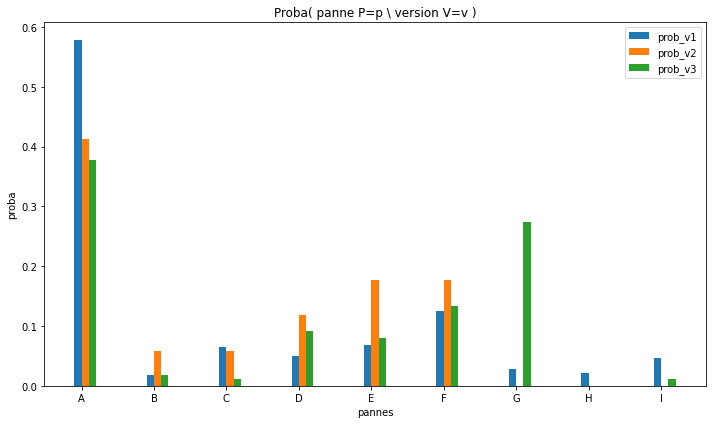

In [538]:
# Define data

V = dict_panne.keys()
prob_pv1 = [i for i in Mat_vraissemblance['v1']]
prob_pv2 = [i for i in Mat_vraissemblance['v2']]
prob_pv3 = [i for i in Mat_vraissemblance['v3']]
x = np.arange(len(labels)) 

x = np.arange(len(V))# the label locations
width = 0.10  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-width/2,prob_pv1, width, label='prob_v1')
rects2 = ax.bar(x+width/2, prob_pv2, width, label='prob_v2')
rects3 = ax.bar(x+3*width/2,prob_pv3, width, label='prob_v3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('proba')
ax.set_xlabel('pannes')
ax.set_title('Proba( panne P=p \ version V=v )')
ax.set_xticks(x)
ax.set_xticklabels(V)
ax.legend()



fig.tight_layout()

plt.show()
fig.savefig('proba_conditionnelle_panne_sachant_version.png')

In [539]:
# Nous voyons par exemple qu'il est plus vraisemblant qu'une panne E soit de version v2 plutôt que de versions v1 et v3
# Ce graphe est d'autant plus important qu'il retranche le biais lié à la proba q'une donnée d
# prise au hasard soit de version v

In [540]:
# il peut être interressant d'observer les coûts des différentes pannes
data_coûts.pivot_table(index = 'Panne',values = 'Cout',aggfunc = sum,margins = True)

Cout
Panne         
A       435.16
B        19.80
C       289.30
D       605.66
E      1094.06
F        50.38
G       268.18
I       738.98
All    3501.52

In [541]:
# cette série nous donne une idée des pannes dont les réparations/échanges ont été les plus coûteuses, considérant de 
# DataFrame data_coûts; mais bien entendu ce DataFrame ne prend pas en compte tous les produits passés en atelier
# durant cette période

In [542]:
columns_ = data_facteurs.columns.tolist()
columns_

['Id',
 'Version',
 'D1',
 'D2',
 'Panne',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15']

In [543]:
col_diagnostics= list()
for col in columns_:
    if col.startswith("X") == True:
        col_diagnostics.append(col)

In [544]:
col_diagnostics

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15']

In [545]:
# occurences des diagnostics 
occ_diagnostics = data_facteurs.pivot_table(index = 'Version',values = col_diagnostics,aggfunc = sum,margins = True)

In [546]:
occ_diagnostics = occ_diagnostics[col_diagnostics]

In [547]:
occ_diagnostics

X1  X2  X3   X4  X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15
Version                                                                     
v1        91  46  41  144  10  147  54   9  22   40   10    0   21  108   30
v2         4   2   3   12   0   11   4   1   1    4    1    0    0    6    0
v3        60  38  24   88   8   87  25   7  16   18    6    0    7   62   24
All      155  86  68  244  18  245  83  17  39   62   17    0   28  176   54

In [548]:
# Nous remarquons donc que la majeure partie des diagnostics provient des produits de version v1, puis v3 et 
# enfin de façon moindre de v2...bien entendu nous notifions qu'il y'a aussi moins de produits de version v2

In [549]:
data_coûts

Id Panne   Cout
0    349483     A  15.84
1    350021     D  19.14
2    350212     B   9.90
3    351351     F   4.40
4    351351     F  28.16
..      ...   ...    ...
104  388579     C  55.00
105  388579     C   4.40
106  388839     I  55.00
107  388839     I  55.00
108  394414     I  55.00

[109 rows x 3 columns]

In [550]:
cols = data_coûts.columns
data_coûts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      109 non-null    int64  
 1   Panne   109 non-null    object 
 2   Cout    109 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [551]:
# Ce DataFrame contient des attributs Id, Panne et Cout...il peut donc être interressant de créer des tables data_facteurs,
# data_couts, et de les joindre là où data_facteurs.Id == data_couts.Id
# pour observer les diagnostics considérés et les coûts qui y sont associés

In [552]:
import sqlite3

connexion = sqlite3.connect('data.db')

#exportation de nos données sur SQlite
data_facteurs.to_sql('data_facteurs',connexion,if_exists= 'replace',index=False)
data_coûts.to_sql('data_couts',connexion,if_exists= 'replace',index=False)

In [553]:
connexion

In [554]:
#requête SQL"
#nous voulons construire le DataFrame de la jointure
query = """select data_facteurs.Id,data_facteurs.Version,data_facteurs.D1,data_facteurs.D2,data_facteurs.Panne,
data_facteurs.X1,data_facteurs.X2,data_facteurs.X3,data_facteurs.X4,
data_facteurs.X5,data_facteurs.X6,data_facteurs.X7,data_facteurs.X8,data_facteurs.X9,data_facteurs.X10,data_facteurs.X11,
data_facteurs.X12,data_facteurs.X13,data_facteurs.X14,data_facteurs.X15,data_couts.Cout
            from data_facteurs 
            inner join data_couts 
            on data_facteurs.Id == data_couts.Id; 
        """
results = connexion.execute(query).fetchall()

In [555]:
results

[(350021,
  'v1',
  3084.9,
  2389.65,
  'D',
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  19.14),
 (350212,
  'v2',
  4231.849999999999,
  4021.02,
  'B',
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  9.9),
 (351351,
  'v1',
  7200.36,
  5472.61,
  'F',
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4.4),
 (351351,
  'v1',
  7200.36,
  5472.61,
  'F',
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  28.16),
 (352686,
  'v3',
  769.53,
  1144.54,
  'D',
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  38.94),
 (353361,
  'v3',
  7096.4,
  8261.87,
  'E',
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  8.14),
 (353373,
  'v1',
  6987.919999999999,
  6207.75,
  'A',
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  71.5),
 (354172,
  'v2',
  5112.12,
  0.0,
  'E',
  0,
  0,
  0,
  1,
  

In [556]:
# Nous construisons les colonnes
columns_.append(cols[-1])
columns_

['Id',
 'Version',
 'D1',
 'D2',
 'Panne',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'Cout']

In [557]:
#Data de la jointure
Data_join = pd.DataFrame(results, columns=columns_)

In [558]:
n = Data_join.shape[0] 
m = Data_join.shape[1]
nb_diagnostics = len(col_diagnostics)
Data_join

Id Version        D1        D2 Panne  X1  X2  X3  X4  X5  ...  X7  X8  \
0   350021      v1   3084.90   2389.65     D   0   0   0   0   0  ...   0   0   
1   350212      v2   4231.85   4021.02     B   1   0   0   1   0  ...   0   0   
2   351351      v1   7200.36   5472.61     F   0   0   0   1   0  ...   0   0   
3   351351      v1   7200.36   5472.61     F   0   0   0   1   0  ...   0   0   
4   352686      v3    769.53   1144.54     D   0   0   0   0   0  ...   0   0   
..     ...     ...       ...       ...   ...  ..  ..  ..  ..  ..  ...  ..  ..   
95  388579      v1  12449.21  11659.89     C   0   0   0   1   0  ...   0   0   
96  388579      v1  12449.21  11659.89     C   0   0   0   1   0  ...   0   0   
97  388839      v1   1805.74   1929.52     I   1   0   0   0   0  ...   0   0   
98  388839      v1   1805.74   1929.52     I   1   0   0   0   0  ...   0   0   
99  394414      v1  16258.44  15915.87     I   0   0   0   0   0  ...   1   0   

    X9  X10  X11  X12  X13  X14  X15   Cout  
0    0    0    0    0    0    0    0  19.14  
1    0    0    0    0    0    0    0   9.90  
2    0    0    0    0    0    0    0   4.40  
3    0    0    0    0    0    0    0  28.16  
4    0    0    0    0    0    1    0  38.94  
..  ..  ...  ...  ...  ...  ...  ...    ...  
95   0    0    0    0    0    1    0  55.00  
96   0    0    0    0    0    1    0  55.00  
97   0    0    0    0    0    0    0  55.00  
98   0    0    0    0    0    0    0  55.00  
99   0    0    0    0    0    1    0  55.00  

[100 rows x 21 columns]

In [559]:
#Nous pouvons encore nous interresser aux occurences des diagnostics après la jointure effectuée
occ_diagnostics = Data_join.pivot_table(index = 'Version',values = col_diagnostics,aggfunc = sum,margins = True)

In [560]:
occ_diagnostics

X1  X10  X11  X12  X13  X14  X15  X2  X3  X4  X5  X6  X7  X8  X9
Version                                                                  
v1       24    6    2    0    6   20    6  11   3  35   3  30   9   1   7
v2        2    0    0    0    0    3    0   2   0   7   0   5   1   0   0
v3       13    3    1    0    0   16    4  10   8  21   3  20   9   0   5
All      39    9    3    0    6   39   10  23  11  63   6  55  19   1  12

In [561]:
occ_diagnostics =occ_diagnostics[col_diagnostics]

In [562]:
occ_diagnostics # on re-arrange juste

X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  X12  X13  X14  X15
Version                                                                  
v1       24  11   3  35   3  30   9   1   7    6    2    0    6   20    6
v2        2   2   0   7   0   5   1   0   0    0    0    0    0    3    0
v3       13  10   8  21   3  20   9   0   5    3    1    0    0   16    4
All      39  23  11  63   6  55  19   1  12    9    3    0    6   39   10

In [563]:
#Nous affectons à chaque diagnostic détecté le coût associé, que nous lisons sur la même ligne grâce à la jointure effectuée

mat_cout = np.ones((n,nb_diagnostics))   
for i in range(n):
    mat_cout[i] = mat_cout[i]*Data_join['Cout'][i]
cout_diagnostics = Data_join[col_diagnostics].to_numpy()*mat_cout

In [564]:
cout_diagnostics

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 9.9,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [55. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [55. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , 55. ,  0. ]])

In [565]:
data_couts_diagnotics = pd.concat([Data_join[['Id','Version','D1','D2','Panne']],pd.DataFrame(cout_diagnostics,columns = col_diagnostics)],axis = 1)
data_couts_diagnotics

Id Version        D1        D2 Panne    X1   X2   X3     X4   X5  \
0   350021      v1   3084.90   2389.65     D   0.0  0.0  0.0   0.00  0.0   
1   350212      v2   4231.85   4021.02     B   9.9  0.0  0.0   9.90  0.0   
2   351351      v1   7200.36   5472.61     F   0.0  0.0  0.0   4.40  0.0   
3   351351      v1   7200.36   5472.61     F   0.0  0.0  0.0  28.16  0.0   
4   352686      v3    769.53   1144.54     D   0.0  0.0  0.0   0.00  0.0   
..     ...     ...       ...       ...   ...   ...  ...  ...    ...  ...   
95  388579      v1  12449.21  11659.89     C   0.0  0.0  0.0  55.00  0.0   
96  388579      v1  12449.21  11659.89     C   0.0  0.0  0.0  55.00  0.0   
97  388839      v1   1805.74   1929.52     I  55.0  0.0  0.0   0.00  0.0   
98  388839      v1   1805.74   1929.52     I  55.0  0.0  0.0   0.00  0.0   
99  394414      v1  16258.44  15915.87     I   0.0  0.0  0.0   0.00  0.0   

       X6    X7   X8   X9  X10  X11  X12  X13    X14  X15  
0    0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
1    9.90   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
2    4.40   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
3   28.16   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
4   38.94   0.0  0.0  0.0  0.0  0.0  0.0  0.0  38.94  0.0  
..    ...   ...  ...  ...  ...  ...  ...  ...    ...  ...  
95  55.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  
96  55.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  
97   0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
98   0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
99  55.00  55.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  

[100 rows x 20 columns]

In [566]:
data_couts_diagnotics # Dataframe dans lequel nous avons les coûts des diagnostics

Id Version        D1        D2 Panne    X1   X2   X3     X4   X5  \
0   350021      v1   3084.90   2389.65     D   0.0  0.0  0.0   0.00  0.0   
1   350212      v2   4231.85   4021.02     B   9.9  0.0  0.0   9.90  0.0   
2   351351      v1   7200.36   5472.61     F   0.0  0.0  0.0   4.40  0.0   
3   351351      v1   7200.36   5472.61     F   0.0  0.0  0.0  28.16  0.0   
4   352686      v3    769.53   1144.54     D   0.0  0.0  0.0   0.00  0.0   
..     ...     ...       ...       ...   ...   ...  ...  ...    ...  ...   
95  388579      v1  12449.21  11659.89     C   0.0  0.0  0.0  55.00  0.0   
96  388579      v1  12449.21  11659.89     C   0.0  0.0  0.0  55.00  0.0   
97  388839      v1   1805.74   1929.52     I  55.0  0.0  0.0   0.00  0.0   
98  388839      v1   1805.74   1929.52     I  55.0  0.0  0.0   0.00  0.0   
99  394414      v1  16258.44  15915.87     I   0.0  0.0  0.0   0.00  0.0   

       X6    X7   X8   X9  X10  X11  X12  X13    X14  X15  
0    0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
1    9.90   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
2    4.40   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
3   28.16   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
4   38.94   0.0  0.0  0.0  0.0  0.0  0.0  0.0  38.94  0.0  
..    ...   ...  ...  ...  ...  ...  ...  ...    ...  ...  
95  55.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  
96  55.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  
97   0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
98   0.00   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.00  0.0  
99  55.00  55.0  0.0  0.0  0.0  0.0  0.0  0.0  55.00  0.0  

[100 rows x 20 columns]

In [567]:
# Maintenant que nous avons la matrice de couts associés aux diagnostics, nous pouvons sommer sur les lignes pour obtenir
# la somme des coûts de chaque diagnostic

sum_couts_diagnostics = data_couts_diagnotics.pivot_table(index = 'Version',values = col_diagnostics,aggfunc = sum,margins = True)
sum_couts_diagnostics

X1     X10     X11  X12    X13      X14     X15      X2      X3  \
Version                                                                         
v1        914.76  145.20   78.10  0.0  217.8   560.34  193.16  385.88   60.72   
v2         22.22    0.00    0.00  0.0    0.0   113.30    0.00   36.08    0.00   
v3        567.60   66.88   52.36  0.0    0.0   676.50   56.32  323.18  353.32   
All      1504.58  212.08  130.46  0.0  217.8  1350.14  249.48  745.14  414.04   

              X4      X5       X6      X7    X8      X9  
Version                                                  
v1       1039.28   71.94   864.16  174.24  71.5  245.74  
v2        181.72    0.00    80.74   22.44   0.0    0.00  
v3        804.10   47.74   787.82  185.02   0.0  304.04  
All      2025.10  119.68  1732.72  381.70  71.5  549.78

In [568]:
sum_couts_diagnostics = sum_couts_diagnostics[col_diagnostics]
sum_couts_diagnostics

X1      X2      X3       X4      X5       X6      X7    X8  \
Version                                                                    
v1        914.76  385.88   60.72  1039.28   71.94   864.16  174.24  71.5   
v2         22.22   36.08    0.00   181.72    0.00    80.74   22.44   0.0   
v3        567.60  323.18  353.32   804.10   47.74   787.82  185.02   0.0   
All      1504.58  745.14  414.04  2025.10  119.68  1732.72  381.70  71.5   

             X9     X10     X11  X12    X13      X14     X15  
Version                                                       
v1       245.74  145.20   78.10  0.0  217.8   560.34  193.16  
v2         0.00    0.00    0.00  0.0    0.0   113.30    0.00  
v3       304.04   66.88   52.36  0.0    0.0   676.50   56.32  
All      549.78  212.08  130.46  0.0  217.8  1350.14  249.48

In [569]:
sum_couts_diagnostics = sum_couts_diagnostics[col_diagnostics]
sum_couts_diagnostics = np.round(sum_couts_diagnostics).astype(int)  #arrondir puis convertir en int
sum_couts_diagnostics.sort_values(axis= 1,by='All',inplace = True)
sum_couts_diagnostics

X12  X8   X5  X11  X10  X13  X15   X7   X3   X9   X2   X14    X1  \
Version                                                                     
v1         0  72   72   78  145  218  193  174   61  246  386   560   915   
v2         0   0    0    0    0    0    0   22    0    0   36   113    22   
v3         0   0   48   52   67    0   56  185  353  304  323   676   568   
All        0  72  120  130  212  218  249  382  414  550  745  1350  1505   

           X6    X4  
Version              
v1        864  1039  
v2         81   182  
v3        788   804  
All      1733  2025

In [570]:
col = sum_couts_diagnostics.columns.tolist()  # nous récupérons les colonnes dans une liste
col

['X12',
 'X8',
 'X5',
 'X11',
 'X10',
 'X13',
 'X15',
 'X7',
 'X3',
 'X9',
 'X2',
 'X14',
 'X1',
 'X6',
 'X4']

In [571]:
#nous reconsidérons le Dataframe des occurences occ_diagnostics défini plus haut pour tenir compte 
# de l'ordre croîssant des coûts
occ_diagnostics = occ_diagnostics[col]
occ_diagnostics 

X12  X8  X5  X11  X10  X13  X15  X7  X3  X9  X2  X14  X1  X6  X4
Version                                                                  
v1         0   1   3    2    6    6    6   9   3   7  11   20  24  30  35
v2         0   0   0    0    0    0    0   1   0   0   2    3   2   5   7
v3         0   0   3    1    3    0    4   9   8   5  10   16  13  20  21
All        0   1   6    3    9    6   10  19  11  12  23   39  39  55  63

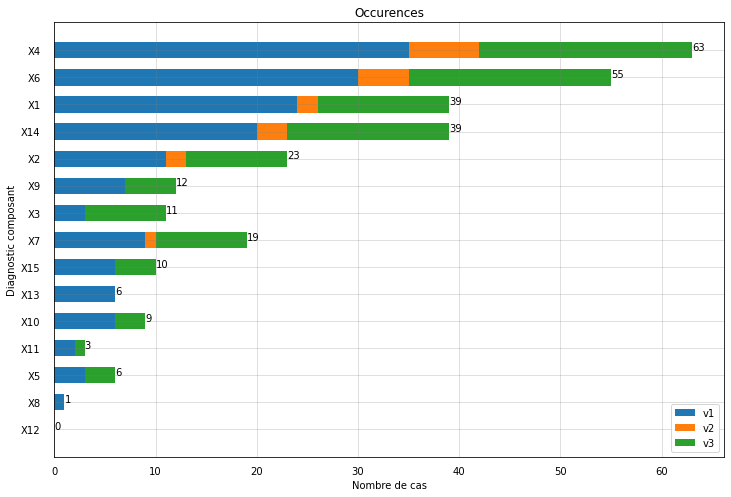

In [572]:
v1 = occ_diagnostics.iloc[0][col]
v2 = occ_diagnostics.iloc[1][col]
v3 = occ_diagnostics.iloc[2][col]
vAll = occ_diagnostics.iloc[3][col]
fig,ax = plt.subplots(figsize=(12,8))
start_tab = [v1[i] + v2[i] for i in range(len(col_diagnostics))]
rec1 = ax.barh(col,v1,height = 0.6,label = "v1")
rec2 = ax.barh(col,v2,left = v1,height = 0.6,label = "v2")
rec3 =  ax.barh(col,v3,left = start_tab,height = 0.6,label = "v3")

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

ax.grid(color='grey', 
        linestyle='-',alpha = 0.5,linewidth = 0.5) 
  
for Px,Py in enumerate(vAll):
    ax.annotate(Py,xy=(Py,Px))
ax.xaxis.set_tick_params(pad=5) 
ax.yaxis.set_tick_params(pad=10)
ax.set_xlabel("Nombre de cas")
ax.set_ylabel("Diagnostic composant")
ax.set_title("Occurences")
plt.legend()
plt.show() 
fig.savefig('Occurences_diagnostics.png')

In [573]:
# Nous remarquons donc que la majeure partie des diagnostics provient des produits de version v1, puis v3 et 
# enfin de façon moindre de v2

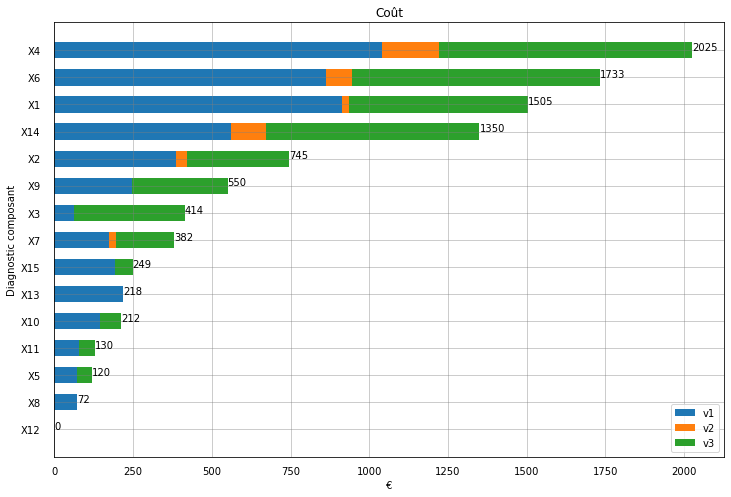

In [574]:
v1_ = sum_couts_diagnostics.iloc[0]
v2_ = sum_couts_diagnostics.iloc[1]
v3_ = sum_couts_diagnostics.iloc[2]
vAll_= sum_couts_diagnostics.iloc[3]
fig,ax = plt.subplots(figsize=(12,8))
start_tab_ = [v1_[i] + v2_[i] for i in range(len(col_diagnostics))]
rec1_ = ax.barh(col,v1_,height = 0.6,label = "v1")
rec2_ = ax.barh(col,v2_,left = v1_,height = 0.6,label = "v2")
rec3_ =  ax.barh(col,v3_,left = start_tab_,height = 0.6,label = "v3")

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

ax.grid(color='grey', 
        linestyle='-',alpha = 0.5 )
for Px_,Py_ in enumerate(vAll_):
    ax.annotate(Py_,xy=(Py_,Px_))
ax.xaxis.set_tick_params(pad=5) 
ax.yaxis.set_tick_params(pad=10)
ax.set_xlabel("€")
ax.set_ylabel("Diagnostic composant")
ax.set_title("Coût")
plt.legend()
plt.show() 
fig.savefig('Coûts_diagnostics.png')

In [575]:
# Le graphe ci-dessous nous renseigne quant aux coûts associés à chaque diagnostic
# Nous voyons que certains diagnostics sont très coûteux, l'une des causes est bien entendu leurs occurences
# En effet X4,X6,X1 et X14 sont les plus occurents.